Machine Learning Project in Python Step-By-Step — Predicting Employee Attrition

https://medium.com/@sayahfares19/machine-learning-project-in-python-step-by-step-predicting-employee-attrition-eef6afc0959b

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import hvplot.pandas

In [2]:
%matplotlib inline
sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")

In [3]:
pd.set_option("display.float_format", "{:.2f}".format)
pd.set_option("display.max_columns", 80)
pd.set_option("display.max_rows", 80)

In [4]:
df = pd.read_csv("../Data//WA_Fn-UseC_-HR-Employee-Attrition.csv")
df.head()

Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   EnvironmentSatisfaction  Gender  HourlyRate  JobInvolvement  JobLevel  \
0                        2  Female          94               3         2   
1                        3    Male          61               2         2   
2                        4    Male          92               2         1   
3                        4  Female          56               3         1   
4                        1    Male          40               3         1   

                 JobRole  JobSatisfaction MaritalStatus  MonthlyIncome  \
0        Sales Executive                4        Single           5993   
1     Research Scientist                2       Married           5130   
2  Laboratory Technician                3        Single           2090   
3     Research Scientist                3       Married           2909   
4  Laboratory Technician                2       Married           3468   

   MonthlyRate  NumCompaniesWorked Over18 OverTime  PercentSalaryHike  \
0        19479                   8      Y      Yes                 11   
1        24907                   1      Y       No                 23   
2         2396                   6      Y      Yes                 15   
3        23159                   1      Y      Yes                 11   
4        16632                   9      Y       No                 12   

   PerformanceRating  RelationshipSatisfaction  StandardHours  \
0                  3                         1             80   
1                  4                         4             80   
2                  3                         2             80   
3                  3                         3             80   
4                  3                         4             80   

   StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
0                 0                  8                      0   
1                 1                 10                      3   
2                 0                  7                      3   
3                 0                  8                      3   
4                 1                  6                      3   

   WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
0                1               6                   4   
1                3              10                   7   
2                3               0                   0   
3                3               8                   7   
4                3               2                   2   

   YearsSinceLastPromotion  YearsWithCurrManager  
0                        0                     5  
1                        1                     7  
2                        0                     0  
3                        3                     0  
4                        2                     2

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [6]:
df.shape

(1470, 35)

In [7]:
df.describe()

Age  DailyRate  DistanceFromHome  Education  EmployeeCount  \
count 1470.00    1470.00           1470.00    1470.00        1470.00   
mean    36.92     802.49              9.19       2.91           1.00   
std      9.14     403.51              8.11       1.02           0.00   
min     18.00     102.00              1.00       1.00           1.00   
25%     30.00     465.00              2.00       2.00           1.00   
50%     36.00     802.00              7.00       3.00           1.00   
75%     43.00    1157.00             14.00       4.00           1.00   
max     60.00    1499.00             29.00       5.00           1.00   

       EmployeeNumber  EnvironmentSatisfaction  HourlyRate  JobInvolvement  \
count         1470.00                  1470.00     1470.00         1470.00   
mean          1024.87                     2.72       65.89            2.73   
std            602.02                     1.09       20.33            0.71   
min              1.00                     1.00       30.00            1.00   
25%            491.25                     2.00       48.00            2.00   
50%           1020.50                     3.00       66.00            3.00   
75%           1555.75                     4.00       83.75            3.00   
max           2068.00                     4.00      100.00            4.00   

       JobLevel  JobSatisfaction  MonthlyIncome  MonthlyRate  \
count   1470.00          1470.00        1470.00      1470.00   
mean       2.06             2.73        6502.93     14313.10   
std        1.11             1.10        4707.96      7117.79   
min        1.00             1.00        1009.00      2094.00   
25%        1.00             2.00        2911.00      8047.00   
50%        2.00             3.00        4919.00     14235.50   
75%        3.00             4.00        8379.00     20461.50   
max        5.00             4.00       19999.00     26999.00   

       NumCompaniesWorked  PercentSalaryHike  PerformanceRating  \
count             1470.00            1470.00            1470.00   
mean                 2.69              15.21               3.15   
std                  2.50               3.66               0.36   
min                  0.00              11.00               3.00   
25%                  1.00              12.00               3.00   
50%                  2.00              14.00               3.00   
75%                  4.00              18.00               3.00   
max                  9.00              25.00               4.00   

       RelationshipSatisfaction  StandardHours  StockOptionLevel  \
count                   1470.00        1470.00           1470.00   
mean                       2.71          80.00              0.79   
std                        1.08           0.00              0.85   
min                        1.00          80.00              0.00   
25%                        2.00          80.00              0.00   
50%                        3.00          80.00              1.00   
75%                        4.00          80.00              1.00   
max                        4.00          80.00              3.00   

       TotalWorkingYears  TrainingTimesLastYear  WorkLifeBalance  \
count            1470.00                1470.00          1470.00   
mean               11.28                   2.80             2.76   
std                 7.78                   1.29             0.71   
min                 0.00                   0.00             1.00   
25%                 6.00                   2.00             2.00   
50%                10.00                   3.00             3.00   
75%                15.00                   3.00             3.00   
max                40.00                   6.00             4.00   

       YearsAtCompany  YearsInCurrentRole  YearsSinceLastPromotion  \
count         1470.00             1470.00                  1470.00   
mean             7.01                4.23                     2.19   
std              6.13                3.62

In [8]:
df.nunique()

Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EmployeeNumber              1470
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBa

In [10]:
df.EmployeeCount.unique()

array([1])

In [11]:
df.drop(
    ['EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours'], 
    axis="columns", 
    inplace=True
)

In [45]:
target = 'Attrition'

In [51]:
categ_nom_feat = [column for column in df.columns if df[column].dtype == object]
categ_nom_feat.remove('Attrition')
categ_nom_feat

['BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'OverTime']

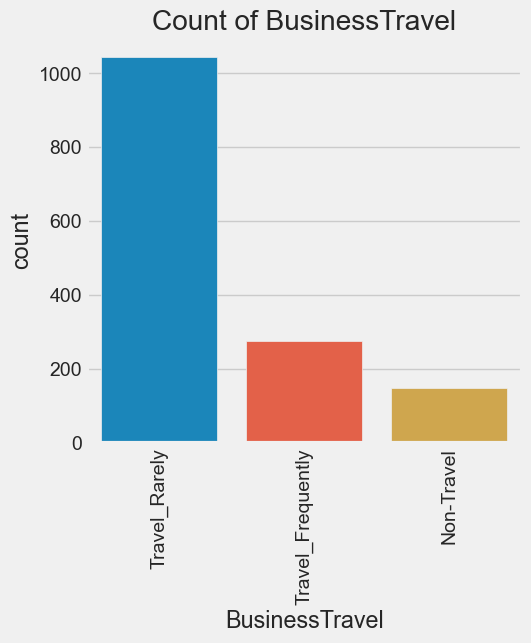

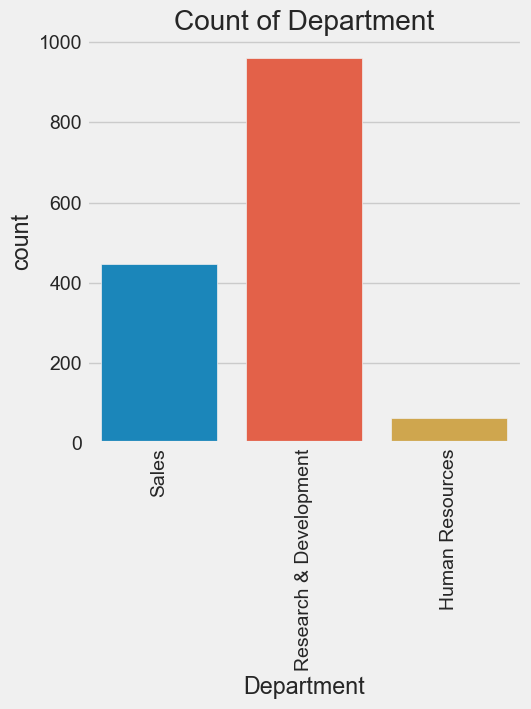

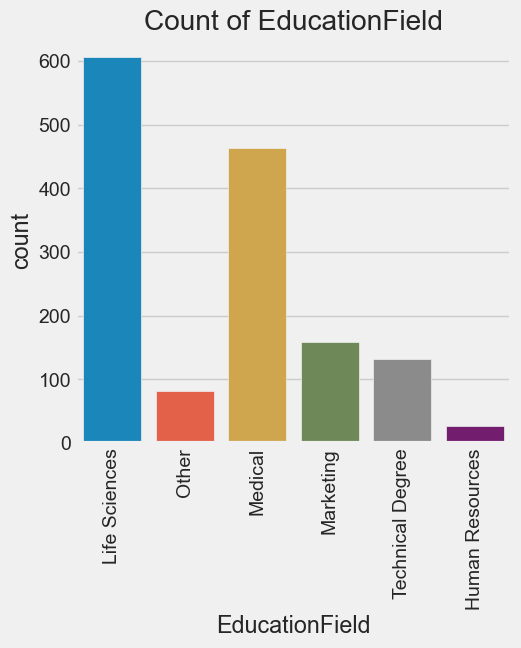

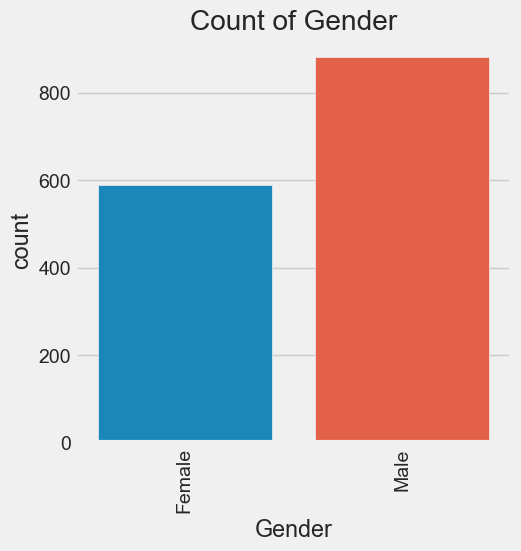

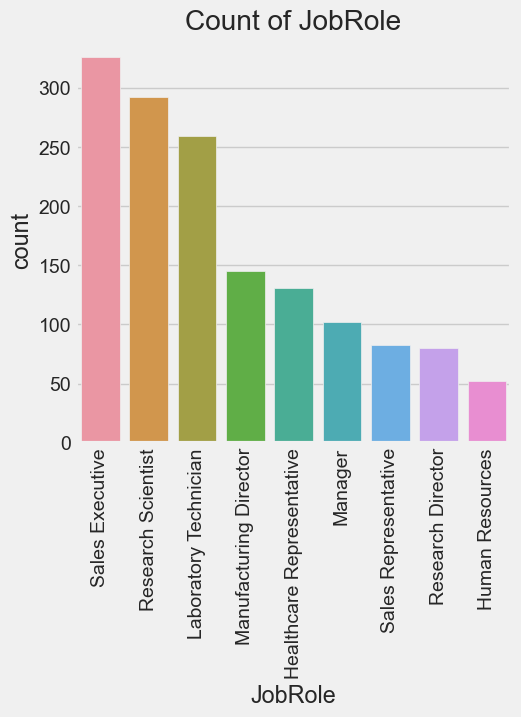

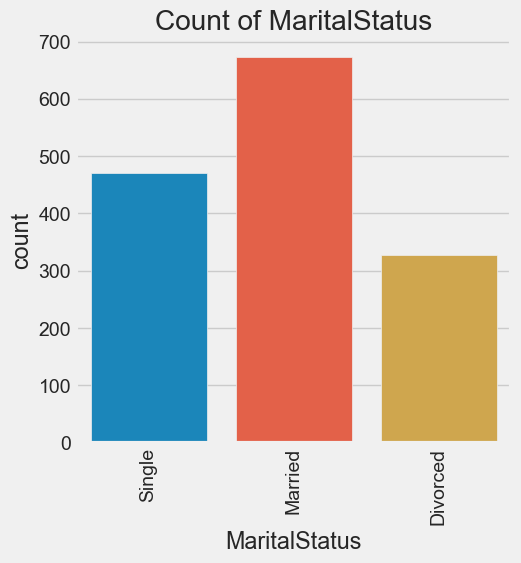

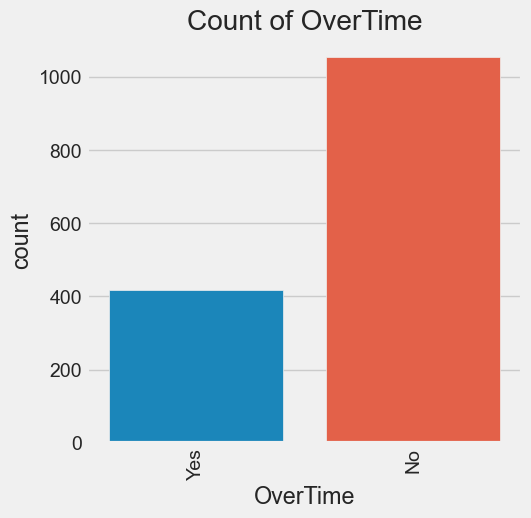

In [44]:
for feature in categ_nom_feat:
    plt.figure(figsize=(5, 5))
    sns.countplot(x=feature, data=df)
    plt.title(f'Count of {feature}')
    plt.xticks(rotation=90)
    plt.show()

In [46]:
len(categ_nom_feat)

7

In [61]:
categ_ord_feat = ['Education', 'EnvironmentSatisfaction', 'JobInvolvement', 'JobLevel', 'JobSatisfaction',
                 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 'WorkLifeBalance']

In [64]:
numerical_feat = [column for column in df.columns if df[column].dtype != object]
numerical_feat = list(set(num_feat) - set(categ_ord_feat))
numerical_feat

['YearsInCurrentRole',
 'TrainingTimesLastYear',
 'HourlyRate',
 'YearsSinceLastPromotion',
 'YearsAtCompany',
 'PercentSalaryHike',
 'MonthlyIncome',
 'DailyRate',
 'Age',
 'DistanceFromHome',
 'MonthlyRate',
 'YearsWithCurrManager',
 'NumCompaniesWorked',
 'TotalWorkingYears']

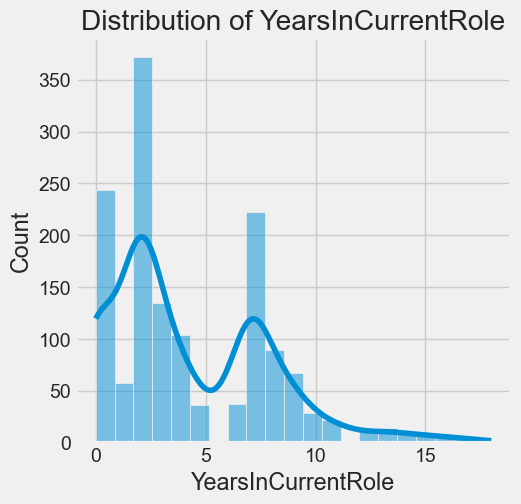

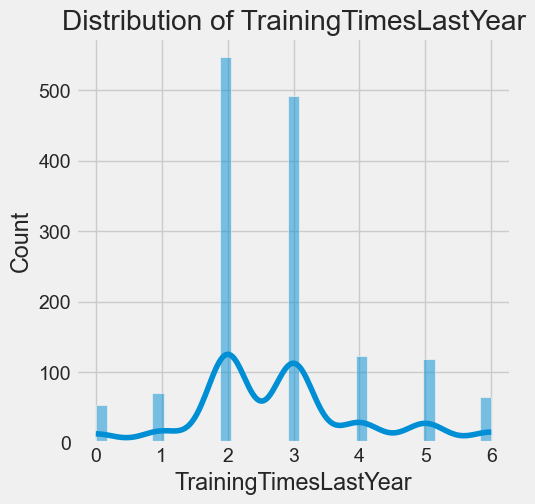

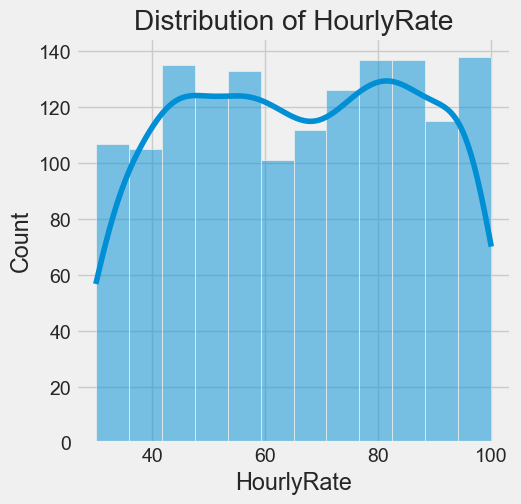

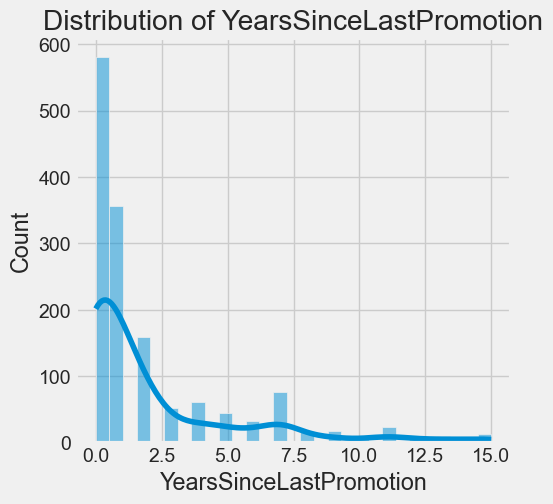

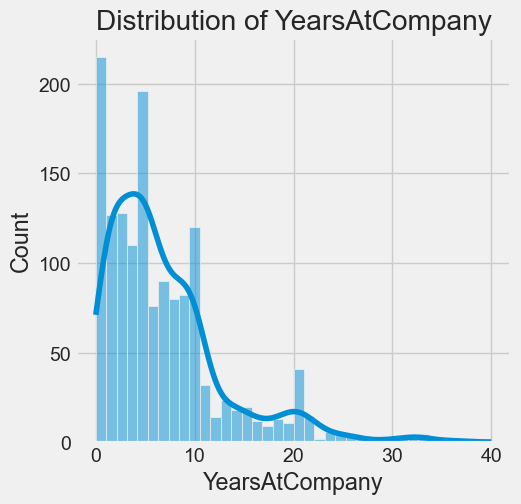

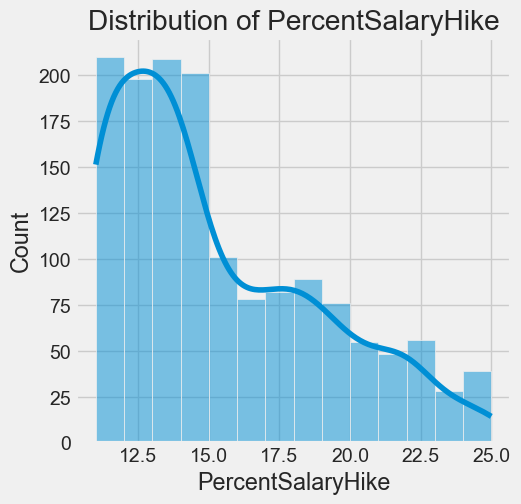

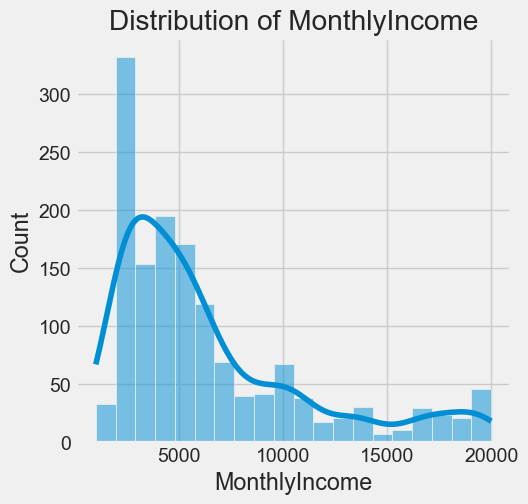

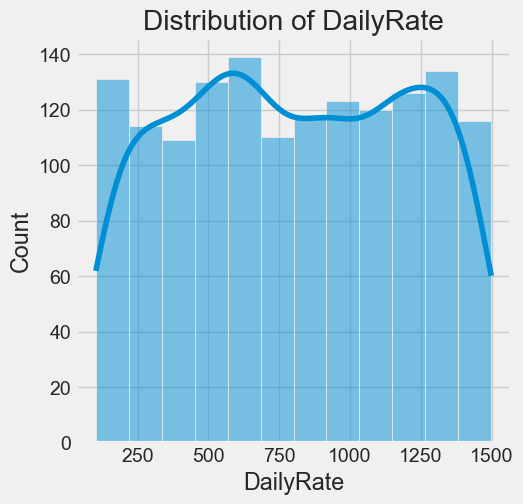

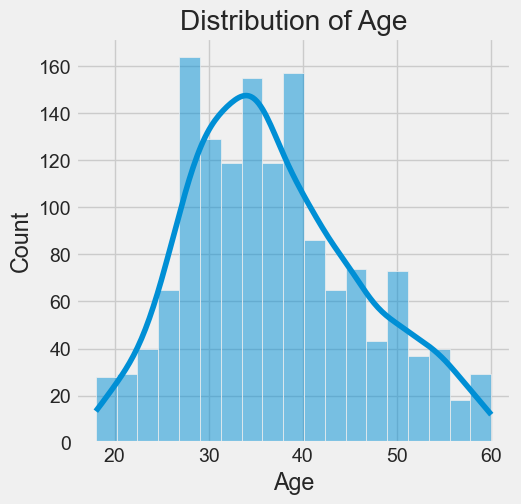

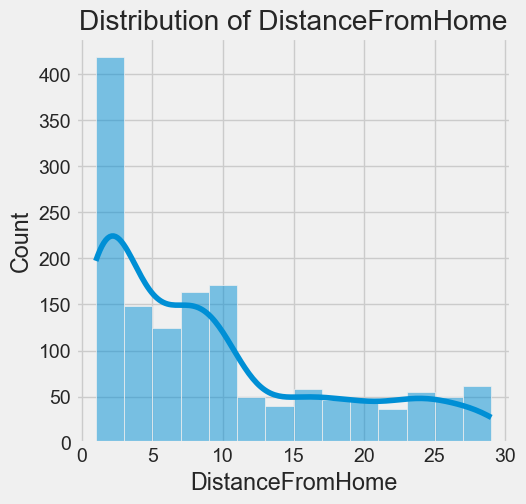

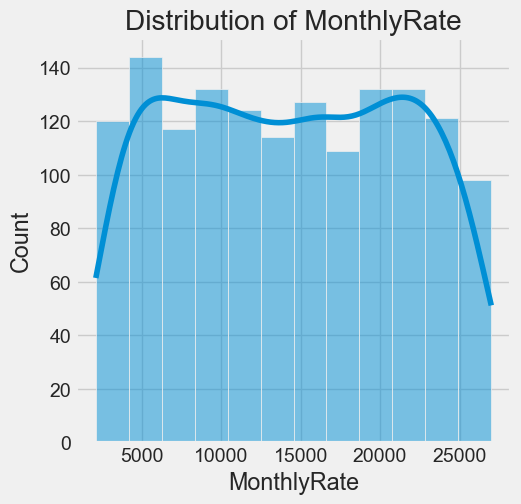

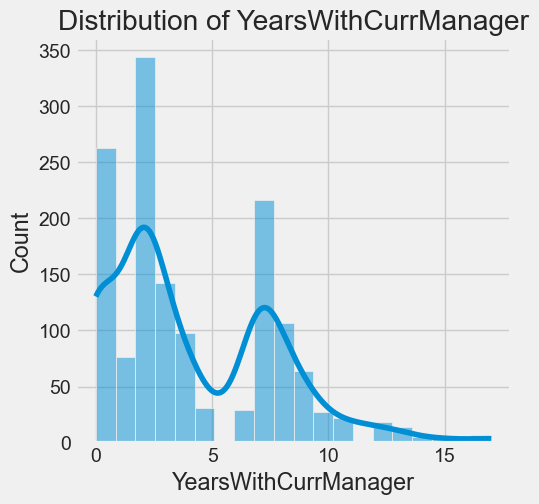

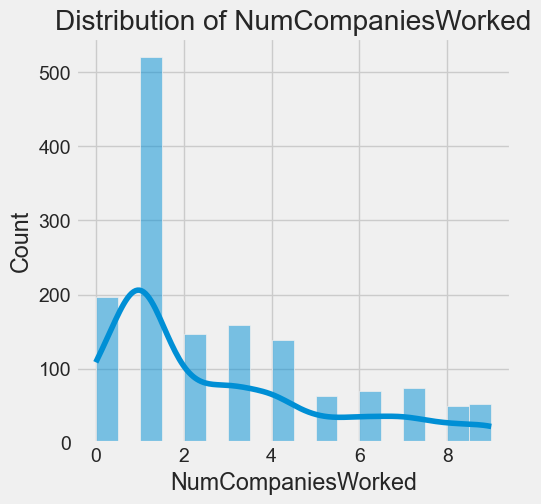

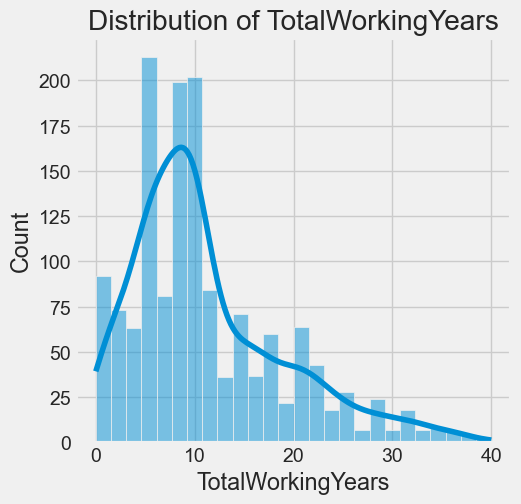

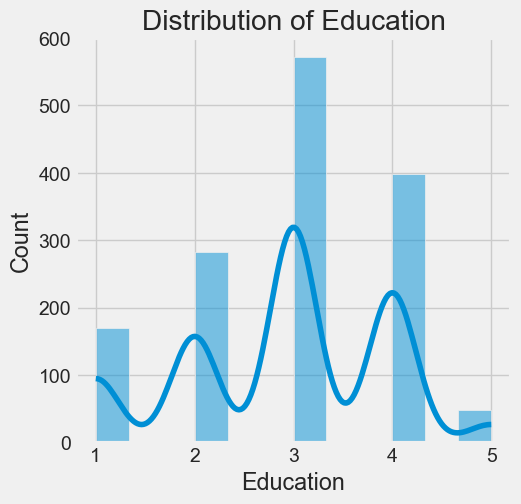

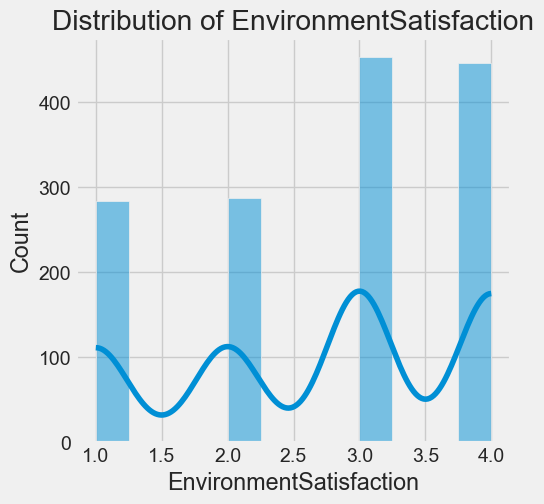

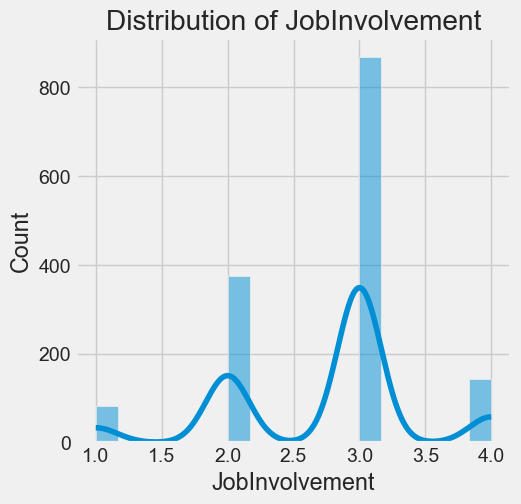

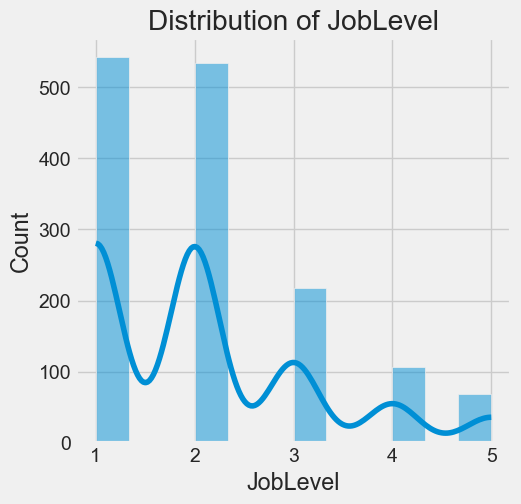

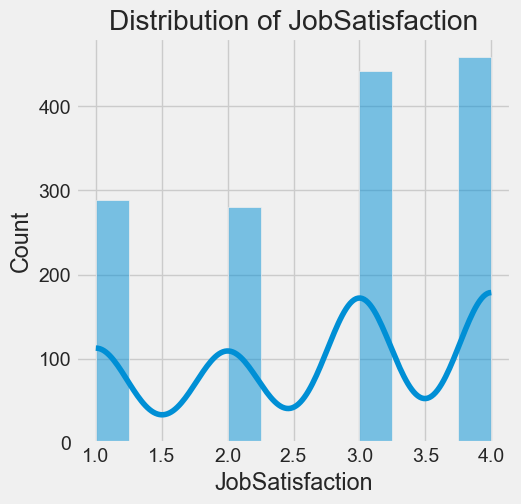

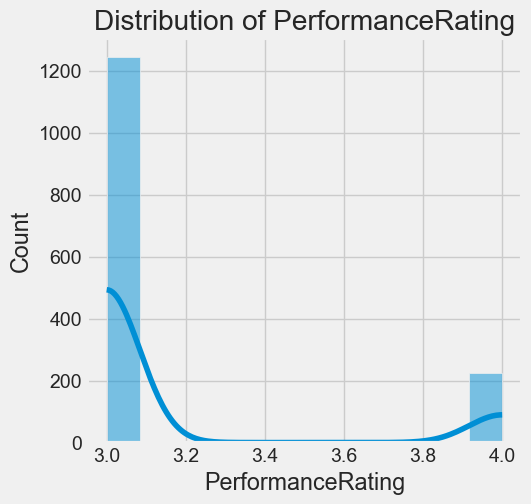

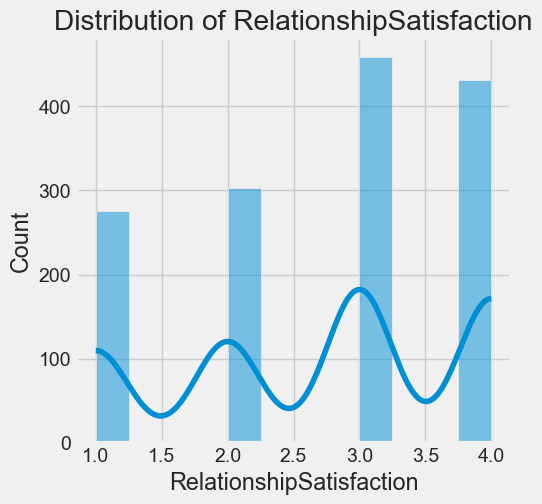

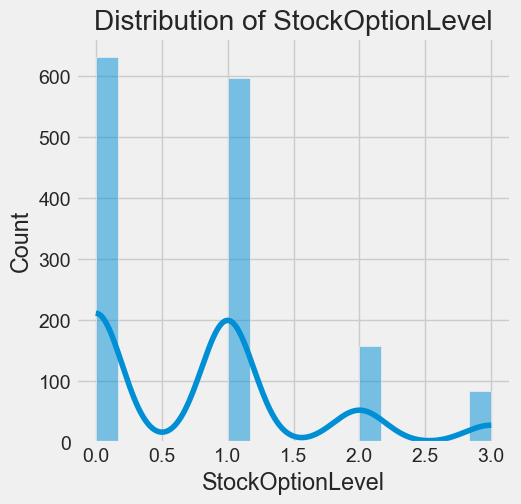

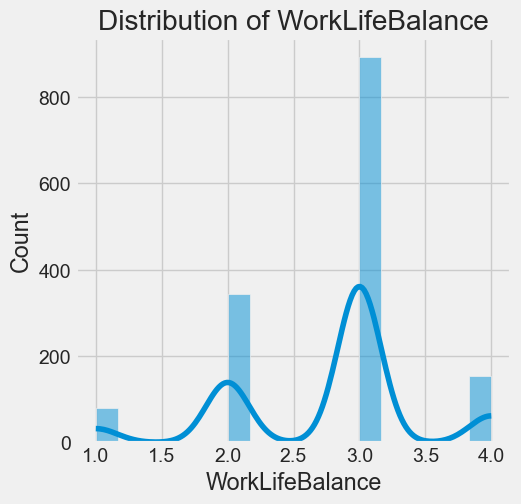

In [65]:
for feature in numerical_feat + categ_ord_feat:
    plt.figure(figsize=(5, 5))
    sns.histplot(x=feature, data=df, kde=True)
    plt.title(f'Distribution of {feature}')
    plt.show()

In [ ]:

for cat_vat in cat_vars:
    sns.countplot(x = cat_vat,  hue = "survived", data=df)
    plt.title('Distribution of Survived vs. {cat_vat}')
    plt.show()

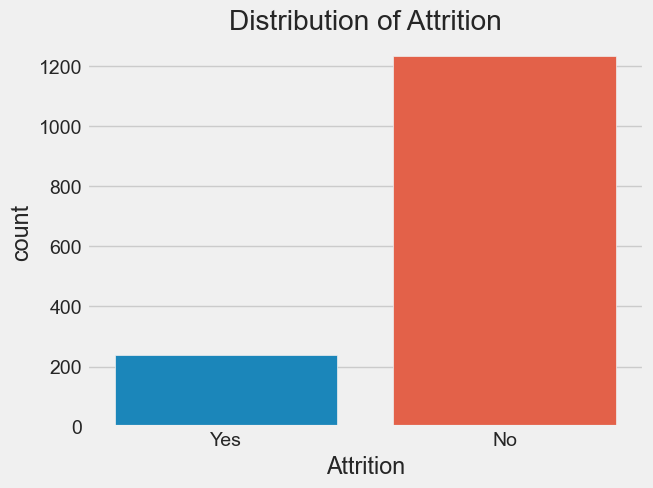

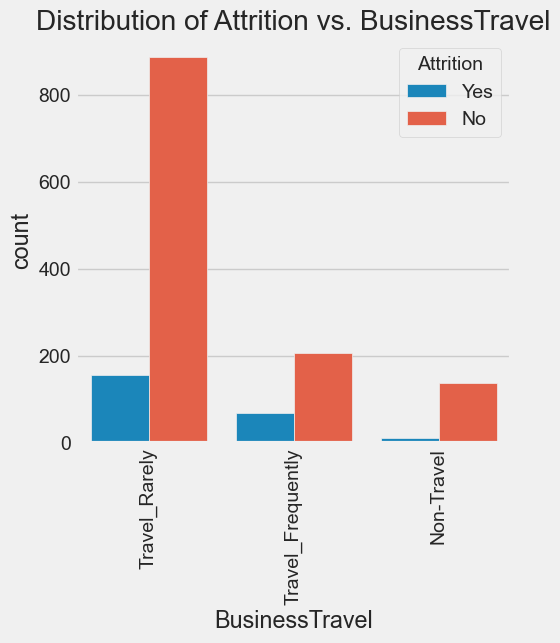

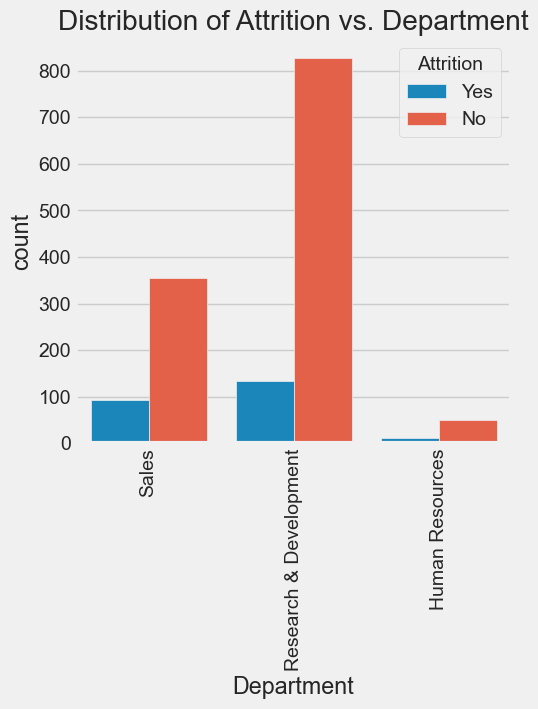

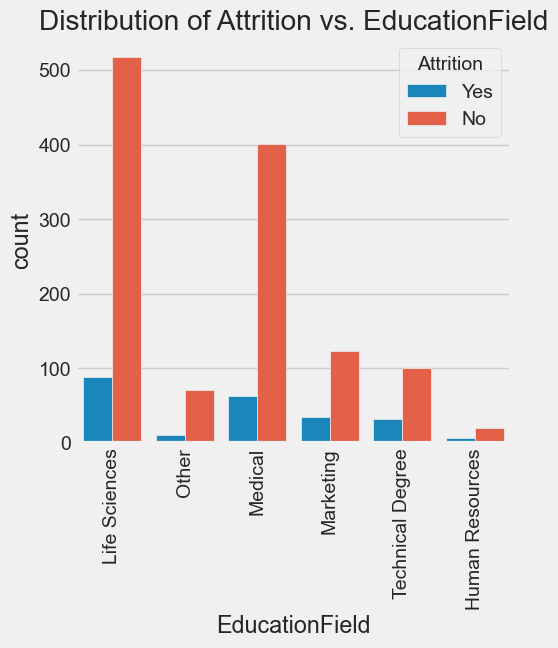

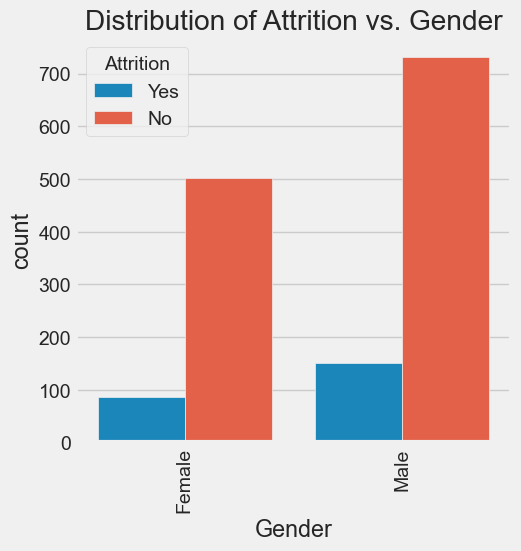

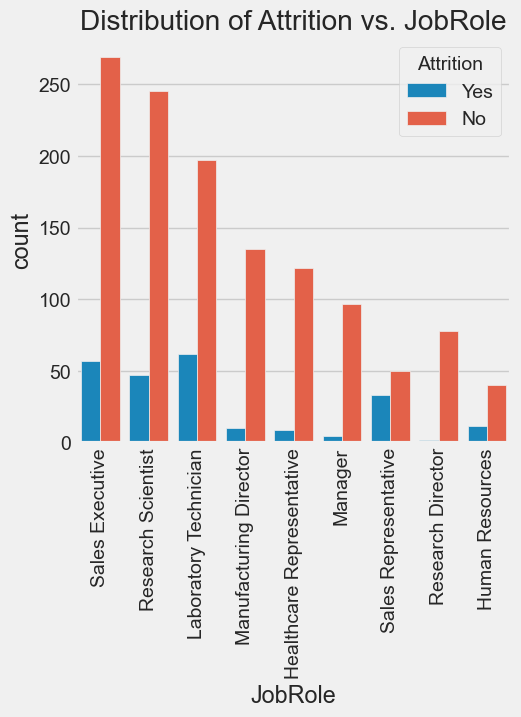

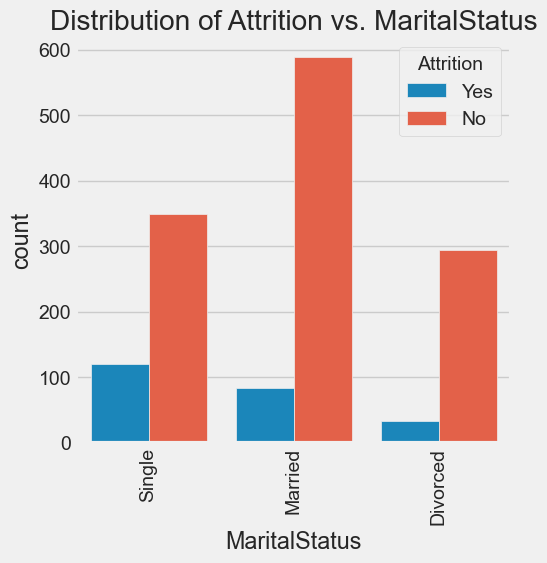

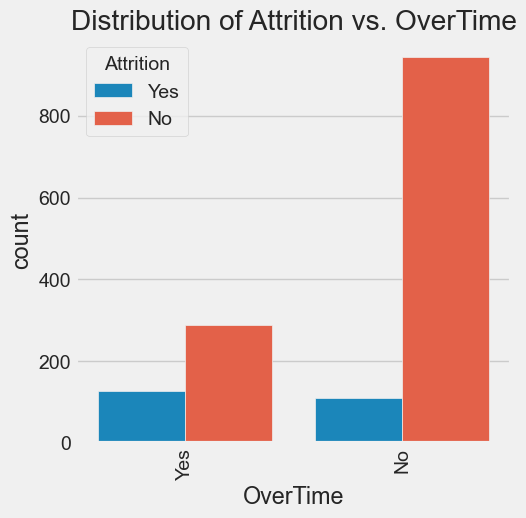

In [84]:
sns.countplot(x = "Attrition", data=df)
plt.title('Distribution of Attrition')
plt.show()

for feature in categ_nom_feat:
    plt.figure(figsize=(5, 5))
    sns.countplot(x=feature, hue=target, data=df)
    plt.title(f'Distribution of {target} vs. {feature}')
    plt.xticks(rotation=90)
    plt.show()

In [ ]:
(df
.groupby(feature)[target]
.value_counts(normalize=True)
.mul(100)
.rename('percent')
.reset_index()
.pipe((sns.catplot,'data'), x=x,y='percent',hue=y,kind='bar'))


In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler

X = data.drop('Attrition', axis=1)
y = data.Attrition

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42,
                                                    stratify=y)

scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)
X_std = scaler.transform(X)

In [67]:
from sklearn.model_selection import train_test_split

In [68]:
relevant_data = df # df.drop(['id'], axis=1)
relevant_data.head(2)

Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   

   DistanceFromHome  Education EducationField  EnvironmentSatisfaction  \
0                 1          2  Life Sciences                        2   
1                 8          1  Life Sciences                        3   

   Gender  HourlyRate  JobInvolvement  JobLevel             JobRole  \
0  Female          94               3         2     Sales Executive   
1    Male          61               2         2  Research Scientist   

   JobSatisfaction MaritalStatus  MonthlyIncome  MonthlyRate  \
0                4        Single           5993        19479   
1                2       Married           5130        24907   

   NumCompaniesWorked OverTime  PercentSalaryHike  PerformanceRating  \
0                   8      Yes                 11                  3   
1                   1       No                 23                  4   

   RelationshipSatisfaction  StockOptionLevel  TotalWorkingYears  \
0                         1                 0                  8   
1                         4                 1                 10   

   TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
0                      0                1               6                   4   
1                      3                3              10                   7   

   YearsSinceLastPromotion  YearsWithCurrManager  
0                        0                     5  
1                        1                     7

In [69]:
relevant_data.drop_duplicates(inplace=True)
df.shape

(1470, 31)

In [70]:
relevant_data.shape

(1470, 31)

In [71]:
X = relevant_data.drop([target], axis=1)
y = relevant_data[target]
X.shape, y.shape

((1470, 30), (1470,))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42,
                 stratify = y)

In [74]:
X_train.shape[0] / len(relevant_data), X_test.shape[0] / len(relevant_data)

(0.7, 0.3)

In [73]:
set(X_train.index) & set(X_test.index)

set()

In [75]:
from sklearn.preprocessing import LabelEncoder

In [76]:
le = LabelEncoder()
le.fit(y_train)
le.transform(y_train)

array([0, 1, 0, ..., 0, 0, 0])

In [79]:
y_train = le.transform(y_train)

In [80]:
y_test = le.transform(y_test)

In [ ]:
train_data = pd.concat([X_train, y_train], axis=1)
test_data = pd.concat([X_test, y_test], axis=1)
train_data.shape, test_data.shape